In [2]:
#0. Specificications. FILL THIS IN. 
aq_username = "delangeo"
aq_password = "Dextrins8!"
aq_url = "http://52.27.43.242/" #Leave as is for UW BIOFAB server. 
plan_id = 33688
host_folder = '/Users/Orlando/Documents/Data/SynAgFiles' #Folder that will host a new directory with the data files and figures for this analaysis
new_folder_name = 'ODL_SynAg_190116' #Name for new directory, which will be a subdirectory of 'host folder'

In [3]:
#1. Import the required modules
import pandas as pd
import os
from FlowCytometryTools import *
from pylab import *
from FlowCytometryTools import FCPlate
import pprint

import pydent
from pydent import AqSession
from tqdm import tqdm
prod = AqSession(aq_username, aq_password, aq_url ) # Production Databaseå

In [4]:
#This block is finding the operations from your plan, and then getting the well numbers for each strain.
#This script assumes 2 to 4 replicates of each strain on the plate. This is very hardwired. I should rewrite 
# it so that its easier to define the set-up used.


#Enter a plan ID, get a list of operations.
plan = prod.Plan.find(plan_id)
ops = plan.operations
yd_ops = filter(lambda x: x.operation_type_id == 563 and x.status == 'done', ops)

#2. Define the metadata table
plate_metadata = []

for op in yd_ops:
    op_metadata = []
    wells = filter(lambda x: x.key == 'sample_plate_location', op.data_associations)
    for well in wells:
        op_metadata.append(well.object['sample_plate_location'])
    overnite = (filter(lambda x: x.name == 'Overnight', op.field_values))
    for on in overnite:
        op_metadata.append(on.sid)
    role =  (filter(lambda x: x.name == 'Sample_role', op.field_values))
    for r in role:
        op_metadata.append(r.value)
    plate_metadata.append(op_metadata)

for dat in plate_metadata:
    if len(dat[0][0]) < 3:
        dat[0][0] = dat[0][0][0] + '0' + dat[0][0][1]
    if len(dat[0][1]) < 3:
        dat[0][1] = dat[0][1][0] + '0' + dat[0][1][1]
    if len(dat[0]) > 2:
        if len(dat[0][2]) < 3:
            dat[0][2] = dat[0][2][0] + '0' + dat[0][2][1]
        if len(dat[0][3]) < 3:
            dat[0][3] = dat[0][3][0] + '0' + dat[0][3][1]

well_info = {}

for dat in plate_metadata:
    well_info[dat[0][0]] = [dat[1],dat[2]]
    well_info[dat[0][1]] = [dat[1],dat[2]]
    if len(dat[0]) > 2:
        well_info[dat[0][2]] = [dat[1],dat[2]]
        well_info[dat[0][3]] = [dat[1],dat[2]]
    
pprint.pprint(well_info)

{}


In [5]:
#1. Define the data directory and alter the filenames. Define the sample plate
#Leave as is. 
dir_path= host_folder + '/' + new_folder_name
for file in os.listdir(dir_path):
    if '.fcs' in file and 'Well_' not in file:
        file_path = dir_path + '/' + file
        rename_file_path = dir_path + '/' + 'Well_' + file
        os.rename(file_path, rename_file_path)
        print('{} was changed to Well_{}'.format(file, file))
        
plate = FCPlate.from_dir(ID='Test Plate', path=dir_path, parser='name')
plate = plate.dropna()
print(plate)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/Orlando/Documents/Data/SynAgFiles/ODL_SynAg_190116'

In [67]:
#Add info into the metadata of the wells. 
for well in plate:
    for info in well_info:
        if well == info:
            plate[well].meta["Sample ID"] = well_info[info][0]
            plate[well].meta["Role"] = well_info[info][1]

//anaconda/lib/python3.5/site-packages/FlowCytometryTools/core/transforms.py:180: RuntimeWarning: divide by zero encountered in log10
  lxmin = max([log10(abs(xmin)), 0])
//anaconda/lib/python3.5/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


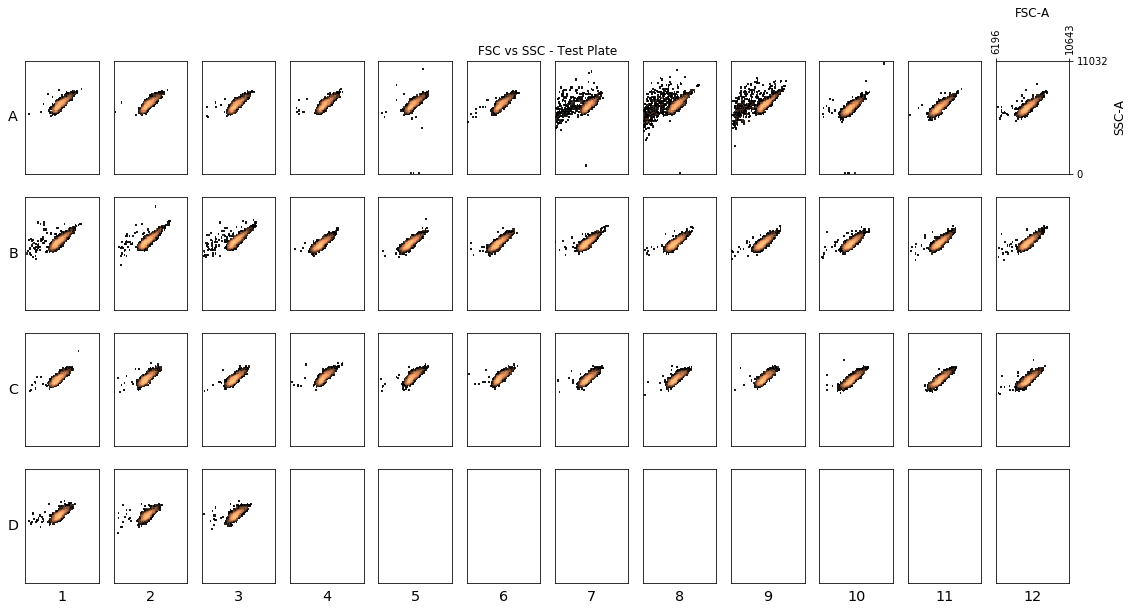

In [58]:
#3. Plot scatterplots (FSC vs. SSC) for all datafiles to check if there are obviously erroneous readings to be removed
tplate = plate.transform('hlog', channels=['FSC-A', 'SSC-A'])

figure(figsize=(20,10));
title('FSC vs SSC - {}'.format(plate.ID))
tplate.plot(['FSC-A','SSC-A'], bins=100, wspace=0.2, hspace=0.2, alpha=0.9);

#Add sample names

(<matplotlib.axes._subplots.AxesSubplot at 0x1138d3470>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a200080>,
       dtype=object))

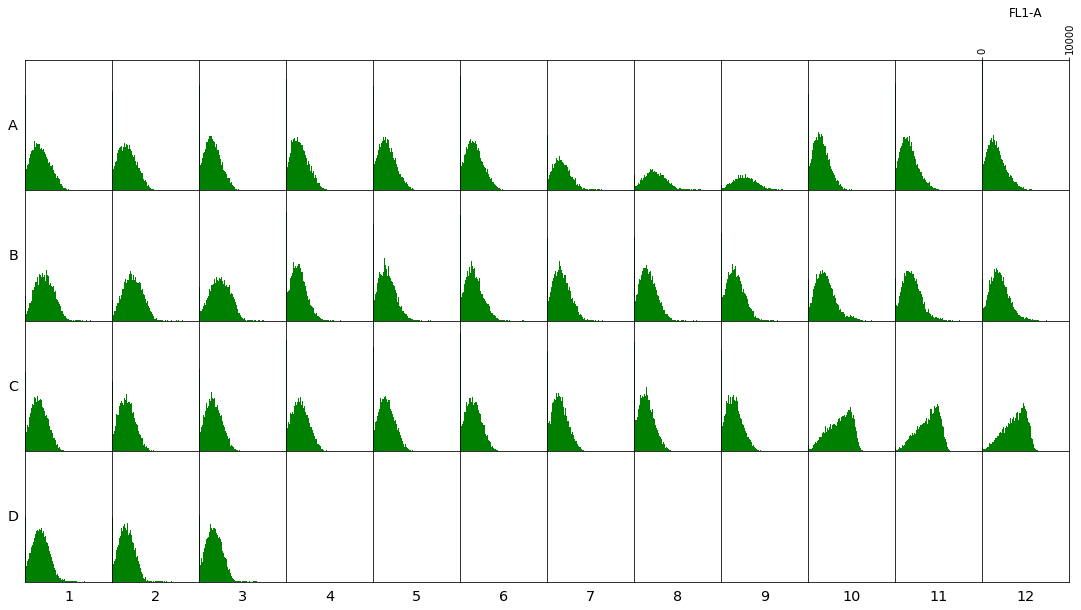

In [59]:
# Produce boxplots of FL1-A for all samples on the same scale 
tplate = plate.transform('hlog', channels=['FL1-A'])
figure(figsize=(20,10));
tplate.plot(['FL1-A'], xlim=(0,10000),bins = 100, color = 'green')


[570.83, 536.5, 608.33, 831.0, 534.0, 678.0, 516.67, 866.67, 579.0, 495.0, 558.0, 2066.33, 515.33]
[30.8, 16.5, 20.1, 201.9, 12.0, 12.0, 23.5, 35.5, 12.1, 9.6, 5.4, 126.0, 4.2]
                                   Median FL1-A 1  Median FL1-A2  \
25290: EBY102 SynAg_V3_alpha_JAZ2           528.0          585.5   
25304: EBY102 SynAg_V3_alpha_MYC3           533.5          518.0   
18622: W303alpha pGalZ4::JAZ9-NLS           585.0          634.0   
25325: EBY102 SynAg_V3_a_MYC4               877.0         1052.0   
25295: EBY102 SynAg_V3_alpha_JAZ7           521.0          550.0   
25321: EBY102 SynAg_V3_a_JAZ13              695.0          670.0   
25314: EBY102 SynAg_V3_a_JAZ6               538.0          484.0   
25309: EBY102 SynAg_V3_a_JAZ1               819.0          904.0   
25303: EBY102 SynAg_V3_alpha_MYC2           572.0          596.0   
25305: EBY102 SynAg_V3_alpha_MYC4           482.0          498.0   
25315: EBY102 SynAg_V3_a_JAZ7               564.0          559.0   
19540: 

<Figure size 432x288 with 0 Axes>

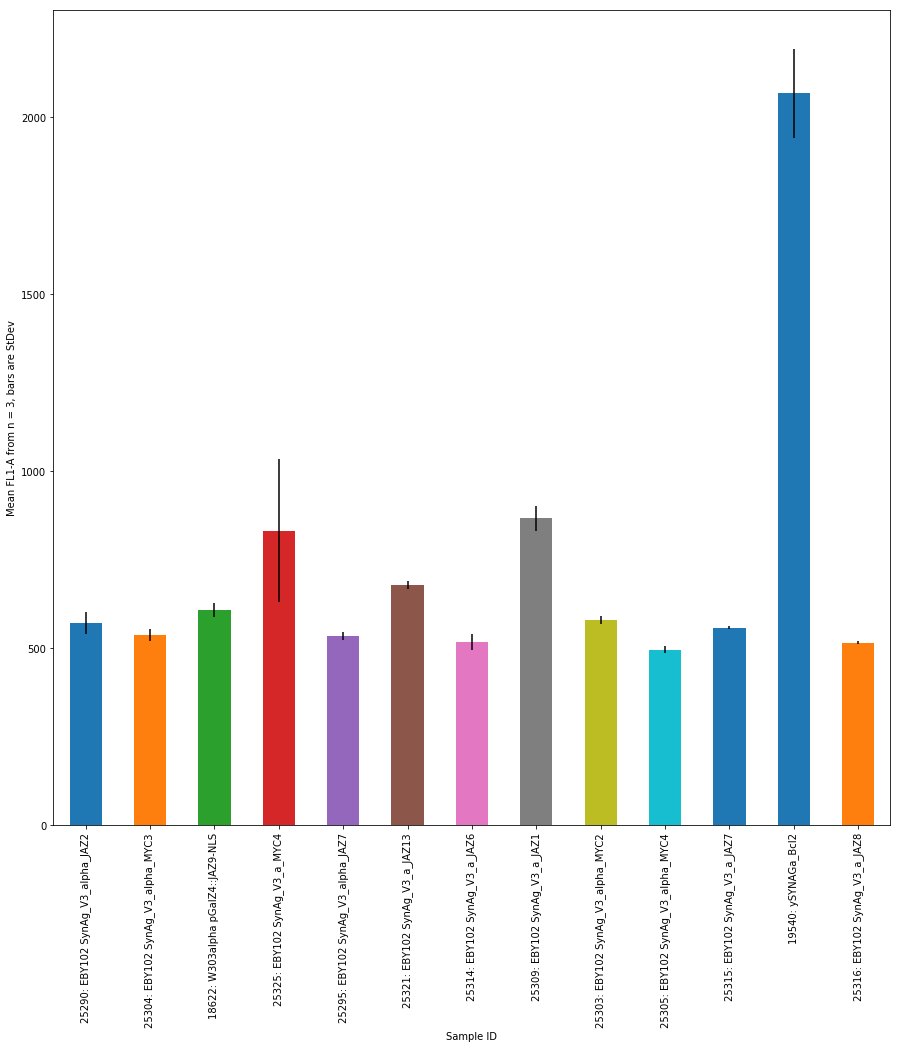

In [69]:
#Calculate median FL1-A for all samples and average the triplicates. Produce a table with these values including the 
# ratio of median FL1-A to the negative control.

# sample_data = {'Sample ID': [], 'Role': [], 'FL1-A mean':[], 'FL1-A sd': []}

sample_ids = []

for well in plate:
    sample_ids.append(plate[well].meta["Sample ID"])

uniq_ids = list(set(sample_ids))

array_of_medians = []

for i in uniq_ids:
    medians = []
    for well in plate:
        if plate[well].meta["Sample ID"] == i:
            medians.append(plate[well]['FL1-A'].median())
    array_of_medians.append(medians)
    
mean_of_medians = []
stdev_of_medians = []
for m in array_of_medians:
    mean_of_medians.append(np.mean(m).round(2))
    stdev_of_medians.append(np.std(m).round(1))
    
print(mean_of_medians)
print(stdev_of_medians)

d = {'Mean': mean_of_medians,'StDev': stdev_of_medians}


medians = pd.DataFrame(data = array_of_medians, index= uniq_ids, columns=['Median FL1-A 1', 'Median FL1-A2','Median FL1-A3'])
means = pd.DataFrame(d, index= uniq_ids)


print(medians)
print(means)

figure()
means.plot.bar(y='Mean',yerr='StDev', legend = False, figsize = (15,15)).set(xlabel="Sample ID", ylabel="Mean FL1-A from n = 3, bars are StDev");
savefig('YeastDisplay_190116.png')
